<center><font size = "10"> Week 3 - Ion Channels <center>
<center><font size = "8">Home work<center>

<font size = "3">Please, write your group number and the names and surnames of the group members here
<br>Group number: 3
<br>Group member1: Laura TESTA
<br>Group member2: Alice ALBRECHT
<br>Group member3: Clara LE DRAOULEC
    
__IMPORTANT:__<font size = "3"> Exercises in <font color='red'>red</font> are mandatory assignements to be delivered by next Monday before 23:59.

# Optional. Conductance/voltage curve

<font size = "3">One way to describe ion channel kinetics is with a conductance/voltage curve. Using data stored in Sigmoid.dat file located in your group folder describing the conductance/voltage relationship for a particular ion channel, find its "best fit" curve using the sigmoid function outlined below:

<font size = "3">The sigmoid function :
\begin{equation}  
    y = \frac {1}{(1 + e^{(\frac{x - vh}{-slope})})}
\end{equation}
    
<font size = "3">Show the data and the fitted curve on the same plot (as it was done in tutorial 1), label the axes with correct units and create a legend to differentiate the data from the fitted curve. At what voltage does this channel reach half its maximal conductance value ? 

In [17]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [7]:
data_path = 'data/Sigmoid.dat'

In [58]:
def func_sigmoid(x, vh, slope):
    return 1/(1 + np.exp((x-vh)/-slope))

def curveFittingSingleSig(fileName):
    '''This function computes an exponential fitting for the data in fileName'''
    # Open the file and separate the columns in x and y
    df = pd.read_table(fileName, sep='\s+', header=None)
    x_data = df[0]
    y_data = df[1]
    
    # In this case, we want to compute TAU = popt[0]
    # and to quantify the fitting quality we want to know perr
    popt, pcov = curve_fit(func_sigmoid, x_data, y_data)
    perr = np.sqrt(np.diag(pcov))
    
    plt.figure(figsize=(10,6))
    plt.plot(x_data, y_data, 'xk', label='original data' )
    plt.plot(x_data, func_sigmoid(x_data, popt[0], popt[1]), '-r',label='fit: vh=%.3f (err=%.3f), slope=%.3f (err=%.3f)' %(popt[0], perr[0], popt[1], perr[1]))
    plt.legend()
    plt.xlabel('Voltage (V)')
    plt.ylabel('Conductance (G)')
    plt.title('Conductance/Voltage curve')
    plt.axvline(x=-19.735, ls = '--')
    plt.show()

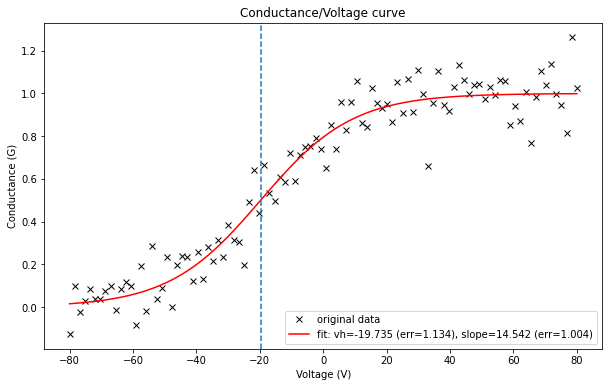

In [59]:
curveFittingSingleSig(data_path)

This channel reaches it maximal conductance at a voltage of -19,735 mV with an error of 1,134. 

# <font color= 'red'>Ex1:</font> Analysing an activation curve.

<font size = "3">Plot each of the traces from the .NWB file in your folder group on one plot and inspect the traces.  Fit each of the traces between a timepoint of your choice (the same for all traces) and the maximum amplitude of the trace to an exponential, to find the time constant at every voltage step. What does this time constant represent ? Plot the time constants for the activation, considering that the clamped voltage stimulation is between -90 and +80 mV with a 10mV step interval. <font color= 'red'>[2 pts]


# <font color= 'red'>Ex2:</font> Finding the rheobase of a cell

<font size = "3">Create a cell in Neuron with the fillowing characteristics: 1 section (soma) with one segment, 15 µm of length and diameter, 120 Ω*cm of axial radius and 1.6 µF/cm^2 of capacitance. Add passive and active (gNa = 0.09 S and gK = 0.01 S) membrane properties to this cell. Generate a current clamp experiment in which you inject 0.028 pA current into the cell soma with 50 ms delay, 500ms in duration. Use a voltage base of -70 mV and set the total recording duration of the experiment to 800ms. This is your base experiment - plot the injeted currnet and the voltage reponse. Now try to modify the injected current to find the rheobase of this cell - what is its amplitude ? What is the threshold membrane voltage for this cell? 
Now generate a second current clamp experiment where you first inject rheobase current strength into the cell soma with 50 ms delay for 60 ms in duration (stimulus 1) and then a second stimulus with 180 ms delay, half the duration and double the amplitude of simulus 1. What do you observe ? What can you conclude ? Plot the injected current and the voltage response, justify your answer. <font color= 'red'>[1.5 pt]

# <font color= 'red'>Ex3:</font> Modifing K+ channel kinetics

<font size = "3">Considering the Boltzmann sigmoid function used to represent ion channel dynamics (slide 31 from this week's lecture), explain the meaning of the parameter V1/2. Considering only the dynamics for Na+ and K+ channels in a neuron, illustrate what is the effect of increasing and decreasing the value of V1/2 for the K+ channel. 
To do so, create a cell in Neuron with the following characteristics: 1 section (soma) with one segment, 17.0 µm of length and diameter, 122 Ω*cm of axial radious and 1.2 µF/cm^2 of capacitance. Add passive and active (gNa = 0.09 S and gK = 0.01 S) membrane properties to this cell. Generate a current clamp experiment in which you inject a current into the cell soma with 150 ms delay, 600 ms of duration. The total recording duration of the experiment should be 1000 ms and the voltage base -70 mV. 

<font size = "3">Increase and decrase the v_half parameter on the mod file with the K+ channel kinetics. Plot the resulting voltage curves and the I-V and tau-V curves. 
<font size = "3">Explain the meaning of v_half and what you observe. Why does changing this parameter affect the resultant action potential? <font color= 'red'>[2.5 pts]
